In [124]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

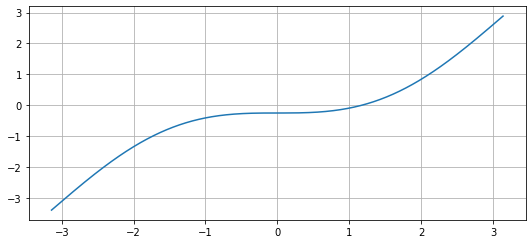

In [113]:
plt.grid(True)
x = np.arange(-np.pi,np.pi,0.01)
y = fun(x)
plt.plot(x,y)
plt.show()

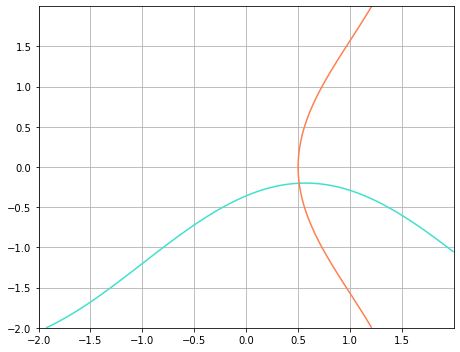

In [125]:
delta = 0.0025
x, y = np.mgrid[-2:2:delta,
                -2:2:delta]
equation1 = np.sin(x+1) - y - 1.2
equation2 = 2*x + np.cos(y) - 2

fig = plt.figure()
ax = plt.axes() 
plt.grid(True)
ax.contour(x, y, equation1, [0], colors = "turquoise")
ax.contour(x, y, equation2, [0], colors = "coral")

fig.set_figwidth(6.5)    
fig.set_figheight(5)    

plt.show()

In [122]:
def fun(x):
    return x - np.sin(x) - 0.25
def funx(x):
    return 1 - np.cos(x)
def step(x):
    return (x - np.sin(x) - 0.25)/(1 - np.cos(x))
print("Локализация корня методом Ньютона")
eps = 0.0001
a, b = -0.75, 1.25
print("Область [a, b] = [", a,",", b, "]")
x0 = a
res = pd.DataFrame()
res["x0"] = [x0, fun(x0)]
k = 1
while True:
    x1 = x0 - step(x0)
    if abs(x1 - x0) < eps:
        break
    x0 = x1
    res["x"+str(k)] = [x0, fun(x0)]
    k += 1
res = res.rename(index={0: 'x', 1: 'f(x)'})
res

Локализация корня методом Ньютона
Область [a, b] = [ -0.75 , 1.25 ]


,x0,x1,x2,x3,x4,x5,x6
x,-0.750000,0.436538,2.955937,1.684338,1.288418,1.180258,1.171290
f(x),-0.318361,-0.236267,2.521346,0.440777,0.078023,0.005553,0.000037


In [123]:
print("Решение системы нелинейных уравнений методом Ньютона")
eps = 0.0001
def f1(x):
    return np.sin(x[0]+1) - x[1] - 1.2
def f1x(x):
    return np.cos(x[0]+1)
def f1y(x):
    return -1

def f2(x):
    return 2*x[0] + np.cos(x[1]) - 2
def f2x(x):
    return 2
def f2y(x):
    return -1*np.sin(x[1])
x0 = np.array([0.5, -0.25])
#x0 = np.array([10, -10])
res = pd.DataFrame()
res["x0"] = x0
k = 1
while True:
    x1 = x0 + np.linalg.solve(np.array([[f1x(x0), f1y(x0)],[f2x(x0), f2y(x0)]]), np.array([-f1(x0), -f2(x0)]))
    pogr = sum(abs(x0[i] - x1[i]) for i in range(len(x0)))
    #print("pogr: ", pogr)
    if pogr < eps:
        break
    x0 = x1
    res["x"+str(k)] = x0
    k += 1
print("solution\n", x0)
res = res.rename(index={0: 'x', 1: 'y'})
res

Решение системы нелинейных уравнений методом Ньютона
solution
 [ 0.51015014 -0.20183826]


,x0,x1,x2
x,0.50,0.509585,0.510150
y,-0.25,-0.201827,-0.201838
